This notebook shows you how to search your source of interest among the already observed list of targets. A list has been compiled with Observation IDs and pointing coordinates in RA and DEC. The list can be accessed at [UVIT_pointings.txt](\UVIT_pointings.txt) (I will try to keep the list updated). Note that a similar functionality exists already at the ISSDC AstroBrowse website. Also, data download is only possible through the AstroBrowse website. 

This Python script depends on Python packages Numpy, Matplotlib, and Astropy. If you do not have these installed, please install them. If you are using Colab/Binder, uncomment the cell below and run to install the package for the online interactive session.

In [1]:
# !pip install numpy matplotlib astropy

Import packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from astropy import units as u
from astropy.coordinates import SkyCoord

As an example, we will try to find observations of HZ 4 https://simbad.u-strasbg.fr/simbad/sim-id?protocol=html&Ident=HZ4&NbIdent=1&.

In [3]:
input_RA = '58.841615'
input_DEC = '9.788334'
input_coo = SkyCoord(input_RA, input_DEC, unit = (u.deg, u.deg))

The `UVIT_pointings.txt` file has a list of Observation IDs and their pointings. 

In [4]:
uvit_pointings = np.genfromtxt('UVIT_pointings.txt', dtype= None, encoding = None, delimiter=',')
OBSID, RA, DEC = uvit_pointings.T
catalog = SkyCoord(RA, DEC, unit = (u.hourangle, u.deg))

Since UVIT has a field of view of ~0.5 degree, we will try to find those Observation IDs lying within a radius of 0.25 degrees.

In [5]:
d2d = input_coo.separation(catalog)
catalogmsk = d2d < 0.25 * u.deg

To print the criteria matched Observation IDs.

In [6]:
print(OBSID[catalogmsk])

['C02_002T01_9000000888' 'C02_008T01_9000000884' 'C03_013T01_9000001586'
 'C04_010T01_9000003158' 'T01_055T01_9000000394' 'T01_055T01_9000000408']


To print the criteria matched coordinates.

In [7]:
print(catalog[catalogmsk])

<SkyCoord (ICRS): (ra, dec) in deg
    [(58.841625, 9.78833306), (58.841625, 9.78833306),
     (58.841625, 9.78833306), (58.841625, 9.78833306),
     (58.841625, 9.78833306), (58.841625, 9.78833306)]>


**BONUS cell:** To make a plot of all UVIT pointings on the sky.

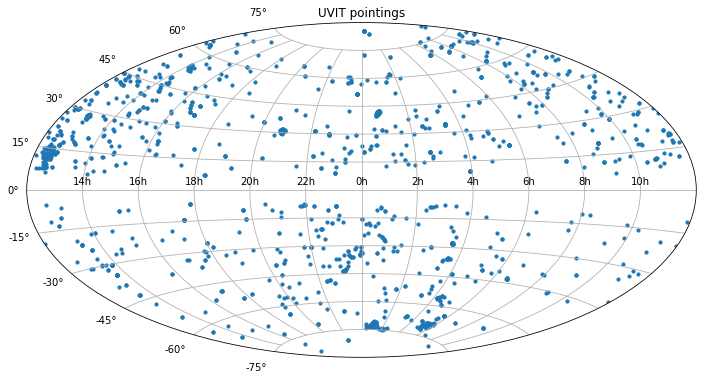

In [8]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection="aitoff")
ax.set_title('UVIT pointings')
ra_rad = catalog.ra.wrap_at(180 * u.deg).radian
dec_rad = catalog.dec.radian
ax.scatter(ra_rad, dec_rad, s= 10)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)
# fig.patch.set_facecolor('w')
# fig.savefig('UVIT_pointings.png', dpi = 300, bbox_inches = 'tight')